# DNA sequencing RNN model
In this project i am going to create a model which can do classification between human,chimpanzees and dog DNA . In this project i am going to use 1D conv layer and GRU. 

In [1]:
#import all important libraries
#!pip install scikeras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import joblib
from keras import utils
from sklearn.model_selection  import train_test_split,GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout, Masking, Flatten, Conv1D, MaxPooling1D, MaxPooling2D, Conv2D, LSTM, GRU, Bidirectional, Embedding
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from scikeras.wrappers import KerasClassifier
import keras
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.sequence import pad_sequences
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Data loading 
columns_name = ["sequence","class"]
data = pd.read_table(r"C:\Users\lenovo\Desktop\4. DNA Sequencing\Data\human.txt")
dog_data = pd.read_table(r"C:\Users\lenovo\Desktop\4. DNA Sequencing\Data\dog.txt")
chimp_data = pd.read_table(r"C:\Users\lenovo\Desktop\4. DNA Sequencing\Data\chimpanzee.txt")
human_data = pd.concat([data,dog_data,chimp_data],ignore_index = True)
print(human_data.shape[0])

6882


In [3]:
human_data["sequence"][0]

'ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG'

### "N" in given sequence represent unknown data and our  first task is to remove it 


In [4]:
count = 0 
indexes = []
for seq in human_data["sequence"]:
    if "N" in seq:
        indexes.append(count)
    count+=1

In [5]:
for i in indexes:
    seq = human_data.iloc[i]['sequence']
    data = seq
    seq = seq.replace("N", "")
    human_data.replace(data, seq, inplace=True)
print(seq)

ATGCGTGGCTTCAACCTGCTCCTCTTCTGGGGATGTTGTGTTATGCACAGCTGGGAAAGGCACATAAGACCCACACGGAAACCAAACACAAAGGGTAATAACTGTAGAGACAGTACCTTGTGCCCAGCTTATGCCACCTGCACCAACACAGTGGACAGTTACTATTGCACTTGCAAACGAGGCTTCCTGTCCAGCAATGGGCAAAATCACTTCAAGGGTCCAGGAGTGCAATGCAAAGCATGGGAAGCTACAGTTGCAGCTGTCAAGTTGGATTCATCTCTAGAAACTCCACCTGTGAAGATGTGGATGAATGTGCAGATCCAAGAGCTTGTCCAGAGCATGCAACTTGTAATAACACTGTTGGAAACTACTCTTGTTTCTGCAACCCAGGATTTGAATCCAGCAGTGGCCACTTGAGTTTCCAGGGTCTCGAAGCATCGTGTGAAGATATTGATGAATGCACTGAAATGTGCCCCATCAATTCAACATGCACCAACACTCCTGGGAGCTACTTTTGCACCTGCCACCCTGGCTTTGCACCAAGCAATGGACATTTGAATTTCACAGACCAAGAAGTGGAATGTAGAGATATTGATGAGTGCCGCCAAGATCCACCAACCTGTGGTCCTAATTCTATCTGCACCAATGCCCTGGGCTCCTACAGCTGTGGCTGCATTGCAGGCTTTCATCCCAATCCAGAAGGCTCCCAGAAAGATGGCAACTTCAGCTGCCAAAGGGTTCTCTTCAAATGTAAGGAAGATATGATACCCGATAAGAAGCAGATCCAGCAATGCCAAGAGGGAACCGCAGTGAAACCTGCATATGTCTCCTTTTGTGCACAAATAAATAACATCTTCAGCGTTCTGGACAAAGTGTGTGAAAATAAAACGACCGTAGTTTCTCTGAAGAATACAACTGAGAGCTTTGTCCCTGTGCTTAAACAAATATCCACGTGGACTAAATTCACCAAGGAAGAGACGTCCTCCCTGGCCACAGTCTT

In [6]:
print(human_data["sequence"][0])

ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG


In [7]:
for seq in human_data['sequence']:
    data = seq
    human_data.replace(data, seq, inplace=True)

In [8]:
#Encoding
sequence = list(human_data.loc[:, 'sequence'])
encoded_list = []
classe_s = human_data["class"]

def encoding_seq(s):
    Encode = {'A':[1,0,0,0],'T':[0,1,0,0],'C':[0,0,1,0],'G':[0,0,0,1]}
    return [Encode[x] for x in s]
for i in sequence:
    seq = encoding_seq(i)
    encoded_list.append(seq)
sequence_s = keras.preprocessing.sequence.pad_sequences(encoded_list,maxlen = 2000)

In [9]:
sequence_s

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 1, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 1]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 1, 0, 0],
        [1, 0, 0, 0],
        [1, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 1, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 1]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 1, 0, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 0]],

       [[0, 1, 0, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 0],
        ...,
        [0, 1, 0, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 1, 0, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 0]]])

In [10]:
# split of data into train and test 
x_train, x_test, y_train, y_test = train_test_split(sequence_s, classe_s, test_size=0.15, random_state=2)
print(sequence_s.shape)
print(classe_s.shape)

(6882, 2000, 4)
(6882,)


In [11]:
#One hot encoding and convert shape of output into (none,7)
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [12]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

### GRU Model

In [13]:
model = Sequential()
model.add(Conv1D(filters = 27, kernel_size = (4), activation = 'relu', input_shape = (350, 4)))
model.add(MaxPooling1D(pool_size= (5)))
model.add(Dropout(0.2))
model.add(Conv1D(filters = 15, kernel_size = (2), activation = 'relu', padding = 'same'))
model.add(Bidirectional(GRU(100, input_shape=(None, 4))))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dense(7, activation='sigmoid', input_shape=(None, 4)))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=5, restore_best_weights=True )
history = model.fit(x_train, y_train, batch_size=100 , epochs=50, validation_data=(x_test, y_test))

C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=a

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 347, 27)             │             459 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 69, 27)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 69, 27)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 69, 15)              │             825 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 200)                 │          70,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │          10,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             357 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,891 (319.89 KB)

 Trainable params: 81,891 (319.89 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.2853 - loss: 0.5137 - val_accuracy: 0.2972 - val_loss: 0.3843
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.3064 - loss: 0.3851 - val_accuracy: 0.3030 - val_loss: 0.3812
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.3137 - loss: 0.3808 - val_accuracy: 0.3011 - val_loss: 0.3815
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.3088 - loss: 0.3835 - val_accuracy: 0.3001 - val_loss: 0.3808
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.3104 - loss: 0.3816 - val_accuracy: 0.3001 - val_loss: 0.3797
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.3167 - loss: 0.3813 - val_accuracy: 0.3001 - val_loss: 0.3789
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.3171 - loss: 0.3793 - val_accuracy: 0.3049 - val_loss: 0.3791
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.3281 - loss: 0.3757 - val_accuracy: 0.3166

In [14]:
# save the model
model.save("DNA_sequence_model.h5")

Accuracy is 73.1848955154419


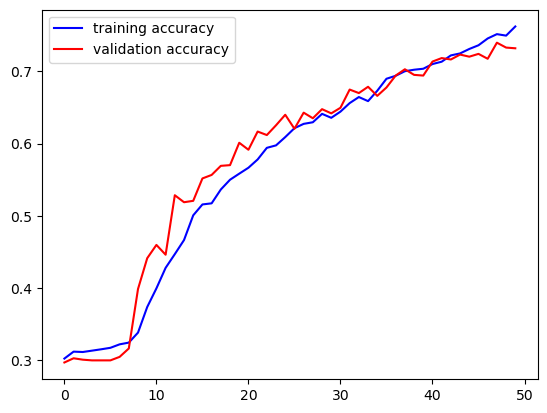

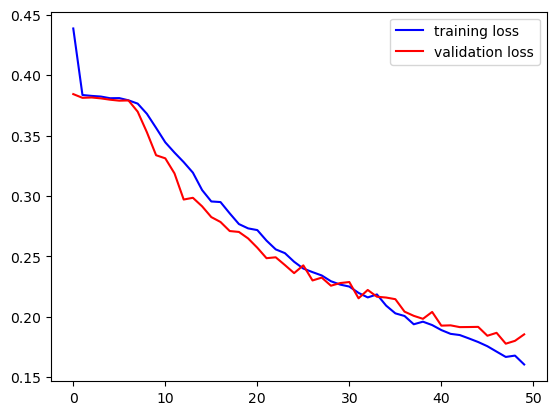

In [16]:
# compare training loss and validation loss , train accuracy and validation accuracy
from keras.models import load_model
model = load_model("DNA_sequence_model.h5")
score = model.evaluate(x_test,y_test,verbose = 0)
print(f"Accuracy is {score[1]*100}")
acc,val_acc = history.history["accuracy"],history.history["val_accuracy"]
loss,val_loss = history.history["loss"],history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs,acc,color = "blue",label = "training accuracy")
plt.plot(epochs,val_acc,color = "red",label = "validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs,loss,color = "blue",label = "training loss")
plt.plot(epochs,val_loss,color = "red",label = "validation loss")
plt.legend()
plt.show()

In [17]:
# prediction and create a confusion matrix
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step


In [18]:
from sklearn.metrics import confusion_matrix
cf_mat = confusion_matrix(y_test,y_pred)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84       138
           1       0.77      0.65      0.71       110
           2       0.92      0.48      0.63        69
           3       0.53      0.73      0.62       155
           4       0.57      0.74      0.64       184
           5       0.81      0.45      0.58        67
           6       0.89      0.85      0.87       310

    accuracy                           0.73      1033
   macro avg       0.77      0.67      0.70      1033
weighted avg       0.77      0.73      0.74      1033



In [21]:
from keras.models import load_model

# Load the saved model
loaded_model = load_model("DNA_sequence_model.h5")

# Preprocess input data
# Assuming 'new_data' contains your new sequences
new_data= [
    "ATCGATCGATCGATCGATCGATCGATCGATCGATCGATCGATCGATCGATCGATCGATCG",
    "CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC",
    "ATATATATATATATATATATATATATATATATATATATATATATATATATATATATATAT",
    "GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG",
    "AGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTAGCTA"
]
encoded_new_data = []
for i in new_data:
    seq = encoding_seq(i)
    encoded_new_data.append(seq)
padded_new_data = keras.preprocessing.sequence.pad_sequences(encoded_new_data, maxlen=2000)

# Make predictions
predictions = loaded_model.predict(padded_new_data)

# Process predictions as needed
# For example, get the class labels:
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes)
# You can use 'predicted_classes' for further analysis or downstream tasks
print("Probability Distributions:", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
[6 6 2 1 4]
Probability Distributions: [[0.01412801 0.07737922 0.03618878 0.3431057  0.10742129 0.16064967
  0.4408105 ]
 [0.10484934 0.03197532 0.01703501 0.01076343 0.13739175 0.0307679
  0.6437279 ]
 [0.06900949 0.05922465 0.2903038  0.11192051 0.21782902 0.09282147
  0.1488187 ]
 [0.00370275 0.8931187  0.00426924 0.01372686 0.06271089 0.07645436
  0.01428306]
 [0.02151564 0.05514845 0.02937303 0.33307132 0.367042   0.07913258
  0.3034915 ]]
